# Vérification poutre bois en flexion simple avec prise en compte du déversement

In [1]:
## Importation des différentes bibliothèques nécéssaires

from math import *
import ipywidgets as widgets
from tkinter import *
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Javascript, display
from ipywidgets import widgets
import pandas as pd
from math import *
import matplotlib.pyplot as plt

## 1. Données d'entrée

### 1.1. Références normatives

*- NF EN 1995 + AN : Conception et calcul des structures en bois*

### 1.2. Matériau

In [2]:
## Création d'une liste déroulante 

bois=widgets.Dropdown(
    options=['Résineux','Feuillus','Lamellé collé'],
    value='Résineux',
    description='Bois :',
    disabled=False,
)
bois

Dropdown(description='Bois :', options=('Résineux', 'Feuillus', 'Lamellé collé'), value='Résineux')

In [3]:
## Création d'un bouton qui permet d'actualiser les cellules suivantes grace à JavaScript

## Dans display(Javascript(....index()+1,.....index()+2), index+1=première cellule à actualiser, index+2=dernière cellule à actualiser 

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

In [4]:
## Création d'une liste déroulante dont les valeurs sont conditionnées par une liste déroulante précendente avec la fonction if 

if bois.value=='Résineux':
    classe=widgets.Dropdown(
        options=['C14','C16','C18','C20','C22','C24','C27','C30','C35','C40'],
        value='C20',
        description='Classe :',
        disabled=False,
)
elif bois.value=='Feuillus':
    classe=widgets.Dropdown(
        options=['D30','D35','D40','D50','D60','D70'],
        value='D30',
        description='Classe :',
        disabled=False,
)
else:
    classe=widgets.Dropdown(
        options=['GL24h','GL28h','GL32h','GL36h','GL24c','GL28c','GL32c','GL36c'],
        value='GL24h',
        description='Classe :',
        disabled=False,
)

display(classe)

Dropdown(description='Classe :', index=3, options=('C14', 'C16', 'C18', 'C20', 'C22', 'C24', 'C27', 'C30', 'C3…

In [5]:
## Création d'un bouton qui permet d'actualiser les cellules suivantes grace à JavaScript

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+3)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

In [6]:
## Importation de différentes valeur d'un fichier excel grace à panda

caracbois=pd.read_excel("caracB.xlsx")

fmk=caracbois.loc[0,classe.value]
ft0k=caracbois.loc[1,classe.value]
ft90k=caracbois.loc[2,classe.value]
fc0k=caracbois.loc[3,classe.value]
fc90k=caracbois.loc[4,classe.value]
fvk=caracbois.loc[5,classe.value]
e0m=caracbois.loc[6,classe.value]
e05=caracbois.loc[7,classe.value]
pm=caracbois.loc[8,classe.value]

### 1.3. Exposition

In [7]:
## Création d'un ToggelButton

service=widgets.ToggleButtons(
    options=['Classe de service 1', 'Classe de service 2', 'Classe de service 3'],
    description='',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
   
)
service

ToggleButtons(options=('Classe de service 1', 'Classe de service 2', 'Classe de service 3'), value='Classe de …

### 1.4. Géométrie

In [8]:
## Création d'un slider

l=widgets.FloatSlider(
    value=4,
    min=0,
    max=15,
    step=0.5,
    description=('Portée [m]'),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)
l

FloatSlider(value=4.0, continuous_update=False, description='Portée [m]', max=15.0, readout_format='.1f', step…

### 1.5. Chargement

In [9]:
## Création de plusieurs interfaces de saisie

g=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='G [kN/m]:',
    disabled=False)

q=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='Q [kN/m]:',
    disabled=False)

s=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='S [kN/m]:',
    disabled=False
)

w=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='W [kN/m]:',
    disabled=False)

catq=widgets.Dropdown(
        options=['A','B','C','D','E','F','G','H'],
        value='A',
        description='Cat. Q :',
        disabled=False,)

cats=widgets.Dropdown(
        options=['Finlande,etc','1000+','1000-'],
        value='1000-',
        description='Cat. S :',
        disabled=False,)

## Création d'un slider

trav=widgets.FloatSlider(
    value=90,
    min=70,
    max=100,
    step=5,
    description=('Taux de travail [%]'),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)


display(g,q,s,w,catq,cats,trav)

BoundedFloatText(value=0.0, description='G [kN/m]:', step=0.1)

BoundedFloatText(value=0.0, description='Q [kN/m]:', step=0.1)

BoundedFloatText(value=0.0, description='S [kN/m]:', step=0.1)

BoundedFloatText(value=0.0, description='W [kN/m]:', step=0.1)

Dropdown(description='Cat. Q :', options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'), value='A')

Dropdown(description='Cat. S :', index=2, options=('Finlande,etc', '1000+', '1000-'), value='1000-')

FloatSlider(value=90.0, continuous_update=False, description='Taux de travail [%]', min=70.0, readout_format='…

In [10]:
## Création d'un bouton qui permet d'actualiser les cellules suivantes grace à JavaScript

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+7)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
## Déclaration des variables kmod

kmod0=kmod1=kmod2=kmod3=kmod4=kmod5=kmod6=kmod7=kmod8=kmod9=kmod10=kmod12=kmod12=0

## Définition de la valeur de gamma en fonction de la nature du bois 

if bois.value=='Lamellé collé':
    gm=1.25
else:
    gm=1.3

    
## Recherche des coefficient de sécurité en fonction des cas de charge dans feuille excel grace à panda  

coeff=pd.read_excel("caracB.xlsx")
psi0q=coeff.loc[0,catq.value]
psi1q=coeff.loc[1,catq.value]
psi2q=coeff.loc[2,catq.value]
psi0w=coeff.loc[0,'W']
psi1w=coeff.loc[1,'W']
psi2w=coeff.loc[2,'W']
psi0s=coeff.loc[0,cats.value]
psi1s=coeff.loc[1,cats.value]
psi2s=coeff.loc[2,cats.value]

## Définition du kmod en fondtion de la classe de service 

if service.value=='Classe de service 3':
    kmod0=0.5
    kmod1=0.65
    kmod2=kmod9=kmod10=0.7
    kmod3=kmod4=kmod5=kmod6=kmod7=kmod8=kmod11=kmod12=0.9
else :
    kmod0=0.6
    kmod1=0.8
    kmod2=kmod9=kmod10=0.9
    kmod3=kmod4=kmod5=kmod6=kmod7=kmod8=kmod11=kmod12=1.1
    
## Calcul de chaque combinaison de charge avec application du kmod
    
c0=(1.35*g.value)/kmod0
c1=(1.35*g.value+1.5*q.value)/kmod1
c2=(1.35*g.value+1.5*q.value+1.5*psi0s*s.value)/kmod2
c3=(1.35*g.value+1.5*q.value+1.5*psi0w*w.value)/kmod3
c4=(1.35*g.value+1.5*q.value+1.5*psi0s*s.value+1.5*psi0w*w.value)/kmod4
c5=(1.35*g.value+1.5*w.value)/kmod5
c6=(1.35*g.value+1.5*w.value+1.5*psi0q*q.value)/kmod6
c7=(1.35*g.value+1.5*w.value+1.5*psi0s*s.value)/kmod7
c8=(1.35*g.value+1.5*w.value+1.5*psi0q*q.value+1.5*psi0s*s.value)/kmod8
c9=(1.35*g.value+1.5*s.value)/kmod9
c10=(1.35*g.value+1.5*s.value+1.5*psi0q*q.value)/kmod10
c11=(1.35*g.value+1.5*s.value+1.5*psi0w*w.value)/kmod11
c12=(1.35*g.value+1.5*s.value+1.5*psi0w*w.value+1.5*psi0q*q.value)/kmod12

## Définition de l'arrondi du résultat au centième pour chaque cas de charge

c0=round(c0,2)
c1=round(c1,2)
c2=round(c2,2)
c3=round(c2,2)
c4=round(c4,2)
c5=round(c5,2)
c6=round(c6,2)
c7=round(c7,2)
c8=round(c8,2)
c9=round(c9,2)
c10=round(c10,2)
c11=round(c11,2)
c12=round(c12,2)

## Recherche du cas de charge le plus défavorable 

pmax=max(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12)

## Majoration pour taux de travail souhaité

pmax=round(pmax/(trav.value*0.01),2)

## 2. Dimensionnement de la poutre à l'ELU

### 2.1. Combinaisons d'actions à l'ELU

|Combinaison ELU (majoration par kmod) |$$P_{ELU,mod}$$ [kN/m]|
|-----------|-------------|
|$$1.35G$$|{{c0}}|
|$$1.35G+1.5Q$$|{{c1}}|
|$$1.35G+1.5Q+1.5\psi_{0,S}S$$|{{c2}}|
|$$1.35G+1.5Q+1.5\psi_{0,W}W$$|{{c3}}|
|$$1.35G+1.5Q+1.5\psi_{0,S}S+1.5\psi_{0,W}W$$|{{c4}}|
|$$1.35G+1.5W$$|{{c5}}|
|$$1.35G+1.5W+1.5\psi_{0,Q}Q$$|{{c6}}|
|$$1.35G+1.5W+1.5\psi_{0,S}S$$|{{c7}}|
|$$1.35G+1.5W+1.5\psi_{0,Q}Q+1.5\psi_{0,S}S$$|{{c8}}|
|$$1.35G+1.5S$$|{{c9}}|
|$$1.35G+1.5S+1.5\psi_{0,Q}Q$$|{{c10}}|
|$$1.35G+1.5S+1.5\psi_{0,W}W$$|{{c11}}|
|$$1.35G+1.5S+1.5\psi_{0,Q}Q+1.5\psi_{0,W}W$$|{{c12}}|
|$$P_{ELU,mod,max}$$|**{{pmax}}**|

### 2.2. Charge ELU admissible en fonction de la section

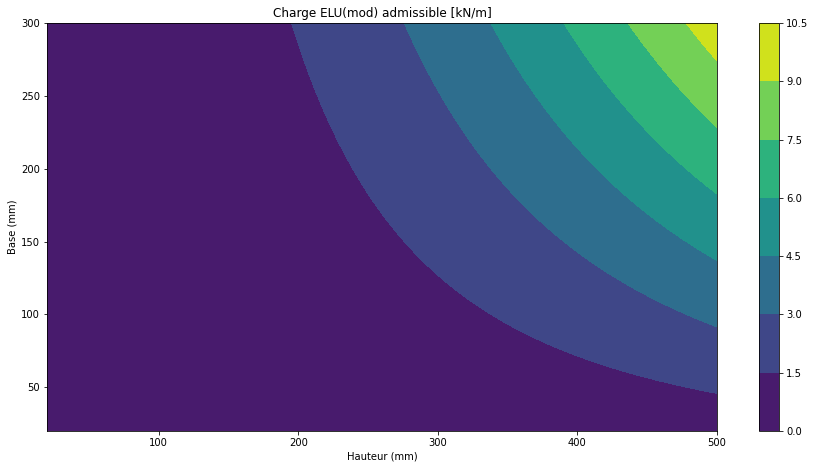

In [43]:
## Déclaration des axes du graphe

xlist = np.linspace(20,500, 100)
ylist = np.linspace(20,300, 100)

X, Y = np.meshgrid(xlist, ylist)

## Calcul de lrel pour Kcrit  

sigcrit=(0.78*e05*Y*Y)/(X*0.9)

lrel=(fmk/sigcrit)**2

## Fonction pour déterminer le moment max

def f(X,Y):
    for lrel in np.arange(0,0.75) : return (4*Y*(X**2)*fmk*1)/(3*(l.value*1000)**2*gm)
    for lrel in np.arange(0.75,1.4) : return (4*Y*(X**2)*fmk*(1.56-0.75*lrel))/(3*(l.value*1000)**2*gm)
    for lrel in np.arange(1.4,100) : return (4*Y*(X**2)*fmk*(1/(lrel**2))/(3*(l.value*1000)**2*gm))
  
Z = f(X,Y)

## Affichage et rendu du graphique

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Charge ELU(mod) admissible [kN/m]')
ax.set_xlabel('Hauteur (mm)')
ax.set_ylabel('Base (mm)')
plt.rcParams["figure.figsize"] = (15, 7.5)
plt.show()

### 2.3. Section optimale pour une hauteur fixée à l'ELU

In [13]:
## Création d'un slider

h=widgets.FloatSlider(
    value=200,
    min=0,
    max=600,
    step=20,
    description=('Hauteur [mm]'),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)
h

FloatSlider(value=200.0, continuous_update=False, description='Hauteur [mm]', max=600.0, readout_format='.1f',…

In [14]:
## Création d'un bouton qui permet d'actualiser les cellules suivantes grace à JavaScript

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+11)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [35]:
## Calcul de b en fontion de la valeur de h saisi précedemment

def b():
    for lrel in np.arange(0,0.75) : return (3*(l.value)**2*pmax*gm)/(4*h.value**2*fmk*1)
    for lrel in np.arange(0.75,1.4) : return (3*(l.value)**2*pmax*gm)/(4*h.value**2*fmk*(1.56-0.75*lrel))
    for lrel in np.arange(1.4,100) : return (3*(l.value)**2*pmax*gm)/(4*h.value**2*fmk*(1/(lrel**2)))
  
b=b()
                                                                      
b=round(b,5)

b=b*1000**2

***Section : {{b}}x{{h.value}}mm ht.***

|**Caractéristiques**|**Valeur**|
|-----------|-------------|
|**Type de bois**|{{bois.value}}|
|**Classe de structure**|{{classe.value}}|
|**Exposition**|{{service.value}}|
|**Charge max ELU [kN/m]**|{{pmax}}|
|**Portée [m]**|{{l.value}}|
|**Base [mm]**|{{b}}|
|**Hauteur [mm]**|{{h.value}}|

## 3. Dimensionnement de la poutre à l'ELS

### 3.1. Combinaisons d'actions à l'ELS

In [36]:
## Calcul des combinaisons d'actions à l'ELS caractéristique

cc1=g.value
cc2=g.value+q.value
cc3=g.value+q.value+psi0s*s.value
cc4=g.value+q.value+psi0w*w.value
cc5=g.value+q.value+psi0s*s.value+psi0w*w.value
cc6=g.value+w.value
cc7=g.value+w.value+psi0q*q.value
cc8=g.value+w.value+psi0s*s.value
cc9=g.value+w.value+psi0q*q.value+psi0s*s.value
cc10=g.value+s.value
cc11=g.value+s.value+psi0q*q.value
cc12=g.value+s.value+psi0w*w.value
cc13=g.value+s.value+psi0q*q.value+psi0w*w.value
cc1=round(cc1,2)
cc2=round(cc2,2)
cc3=round(cc3,2)
cc4=round(cc4,2)
cc5=round(cc5,2)
cc6=round(cc6,2)
cc7=round(cc7,2)
cc8=round(cc8,2)
cc9=round(cc9,2)
cc10=round(cc10,2)
cc11=round(cc11,2)
cc12=round(cc12,2)
cc13=round(cc13,2)

## Recherche de la valeur la plus défavorbale à l'ELS caractéristique 

pcmax=max(cc1,cc2,cc3,cc4,cc5,cc6,cc7,cc8,cc9,cc10,cc11,cc12,cc13)

## Majoration pour taux de travail souhaité
pcmax=round(pcmax/(trav.value*0.01),2)

## Calcul des combinaisons d'actions à l'ELS quasi-perm

cp1=g.value
cp2=g.value+psi2q*q.value
cp3=g.value+psi2w*w.value
cp4=g.value+psi2s*s.value
cp5=g.value+psi2q*q.value+psi2w*w.value
cp6=g.value+psi2q*q.value+psi2s*s.value
cp7=g.value+psi2w*w.value+psi2s*s.value
cp8=g.value+psi2q*q.value+psi2w*w.value+psi2s*s.value
cp1=round(cp1,2)
cp2=round(cp2,2)
cp3=round(cp3,2)
cp4=round(cp4,2)
cp5=round(cp5,2)
cp6=round(cp6,2)
cp7=round(cp7,2)
cp8=round(cp8,2)

## Recherche de la valeur la plus défavorbale à l'ELS quasi-perm

pqpmax=max(cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8)

## Majoration pour taux de travail souhaité
pqpmax=round(pqpmax/(trav.value*0.01),2)

|ELS Caractéristiques|$$P_{ELS}$$ [kN/m]|
|-----------|-------------|
|Caractéristiques||
|$$G$$|{{cc1}}|
|$$G+Q$$|{{cc2}}|
|$$G+Q+\psi_{0,S}S$$|{{cc3}}|
|$$G+Q+\psi_{0,W}W$$|{{cc4}}|
|$$G+Q+\psi_{0,S}S+\psi_{0,W}W$$|{{cc5}}|
|$$G+W$$|{{cc6}}|
|$$G+W+\psi_{0,Q}Q$$|{{cc7}}|
|$$G+W+\psi_{0,S}S$$|{{cc8}}|
|$$G+W+\psi_{0,Q}Q+\psi_{0,S}S$$|{{cc9}}|
|$$G+S$$|{{cc10}}|
|$$G+S+\psi_{0,Q}Q$$|{{cc11}}|
|$$G+S+\psi_{0,W}W$$|{{cc12}}|
|$$G+S+\psi_{0,Q}Q+\psi_{0,W}W$$|{{cc13}}|
|$$P_{ELS,carac,max}$$|**{{pcmax}}**|


|ELS Quasi-permanentes|$$P_{ELS}$$ [kN/m]|
|-----------|-------------|
|$$G$$|{{cp1}}|
|$$G+\psi_{2,Q}Q$$|{{cp2}}|
|$$G+\psi_{2,S}S$$|{{cp3}}|
|$$G+\psi_{2,W}W$$|{{cp4}}|
|$$G+\psi_{2,Q}Q+\psi_{2,W}W$$|{{cp5}}|
|$$G+\psi_{2,Q}W+\psi_{2,S}S$$|{{cp6}}|
|$$G+\psi_{2,W}W+\psi_{2,S}S$$|{{cp7}}|
|$$G+\psi_{2,W}W+\psi_{2,Q}Q+\psi_{2,S}S$$|{{cp8}}|
|$$P_{ELS,qp,max}$$|**{{pqpmax}}**|

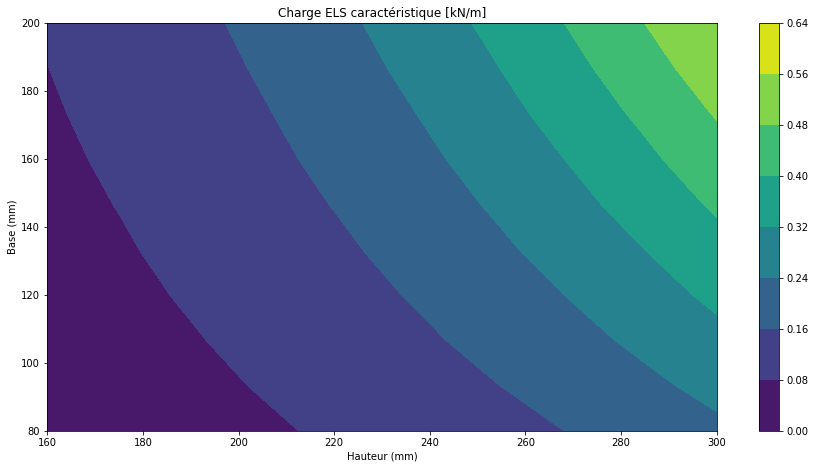

In [37]:
## Calcul de la flèche instantannée limite 

winstmax=(l.value*1000)/300

## Déclaration des axes du graphe

xlist = np.linspace(160,300, 10)
ylist = np.linspace(80,200, 10)

X, Y = np.meshgrid(xlist, ylist)

## Fonction pour déterminer la flèche

def m(X,Y):
    return ((32*Y*e0m*1000*X**3*winstmax)/(5*(l.value*1000)**4))
  
Z = m(X,Y)

## Affichage et rendu du graphique

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
cp.set_clim()
ax.set_title('Charge ELS caractéristique [kN/m]')
ax.set_xlabel('Hauteur (mm)')
ax.set_ylabel('Base (mm)') 
plt.rcParams["figure.figsize"] = (15, 7.5)
plt.show()

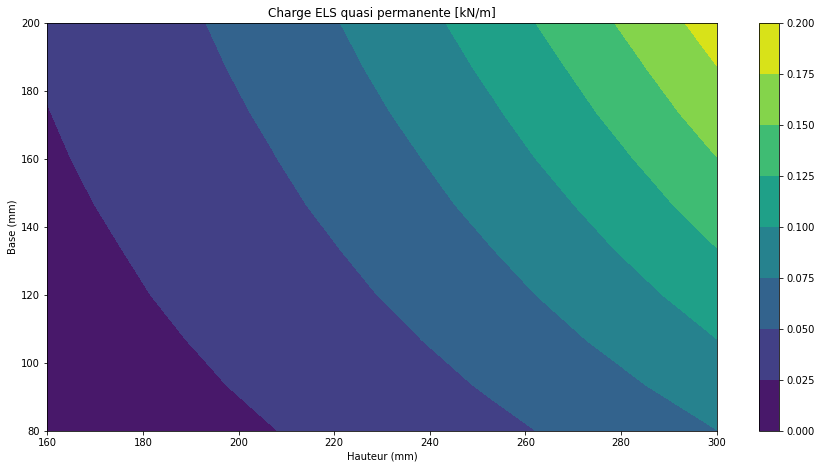

In [38]:
## Calcul de la flèche de fluage limite

wfinmax=(l.value*1000)/200

wfluage=wfinmax-winstmax

if service=='Classe de service 1':
    kdef=0.6
elif service=='Classe de service 2':
    kdef=0.8
else:
    kdef=2

## Déclaration des axes du graphe

xlist = np.linspace(160,300, 10)
ylist = np.linspace(80,200, 10)

X, Y = np.meshgrid(xlist, ylist)

## Fonction pour déterminer la flèche

def zz(X,Y):
    return ((32*Y*e0m*1000*X**3*winstmax)/(5*(l.value*1000)**4*(kdef+1)))
  
Z = zz(X,Y)

## Affichage et rendu du graphique

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('Charge ELS quasi permanente [kN/m]')
ax.set_xlabel('Hauteur (mm)')
ax.set_ylabel('Base (mm)')
plt.rcParams["figure.figsize"] = (15, 7.5)
plt.show()

### 3.3. Section optimale pour une hauteur fixée à l'ELS

In [19]:
## Création d'un slider

h2=widgets.FloatSlider(
    value=200,
    min=0,
    max=600,
    step=20,
    description=('Hauteur [mm]'),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)
h2

FloatSlider(value=200.0, continuous_update=False, description='Hauteur [mm]', max=600.0, readout_format='.1f',…

In [20]:
## Création d'un bouton qui permet d'actualiser les cellules suivantes grace à JavaScript

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+8)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [39]:
## Calcul de la largeur b en fonction de la hauteur pour ELS carac. et quasi-permanent

bc1=(5*(l.value*1000)**4*pcmax)/(32*e0m*1000*h2.value**3*winstmax)

bqp1=(5*(l.value*1000)**4*(pcmax+pqpmax+kdef*pqpmax))/(32*e0m*1000*h2.value**3*wfinmax)

## Détermination de la section la plus défavorable à l'ELS 

bels=max(bc1,bqp1)

bels=round(bels/1000,2)

bels=bels*1000

***Section : {{bels}}x{{h2.value}}mm ht.***

## 4. Caractéristiques de la poutre satisfaisant ELU et ELS

In [40]:
## Détermination de la section la plus défavorable entre ELU et ELS 

hfinal=max(h.value,h2.value)

if hfinal==h2.value:
    bfinal=bels
    cdim='ELS'
else:
    bfinal=b
    cdim='ELU'

|**Caractéristiques**|**Valeur**|
|-----------|-------------|
|**Type de bois**|{{bois.value}}|
|**Classe de structure**|{{classe.value}}|
|**Exposition**|{{service.value}}|
|**Charge max ELU [kN/m]**|{{pmax}}|
|**Charge max carac. ELS [kN/m]**|{{pcmax}}|
|**Chage max quasi-perm. ELS [kN/m]**|{{pqpmax}}|
|**Portée [m]**|{{l.value}}|
|**Base [mm]**|{{bfinal}}|
|**Hauteur [mm]**|{{hfinal}}|
|**Situation dimensionnante**|{{cdim}}|

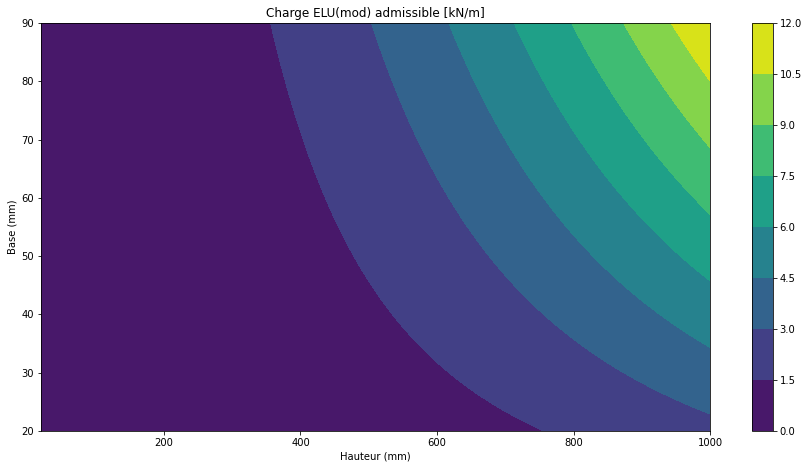

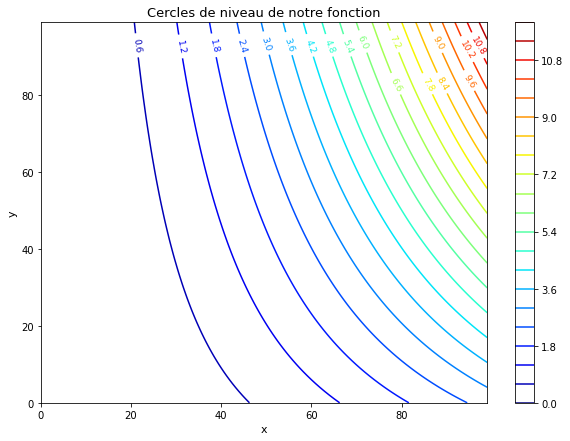

In [41]:
## Déclaration des axes du graphe

xlist = np.linspace(20,1000, 100)
ylist = np.linspace(20,90, 100)

X, Y = np.meshgrid(xlist, ylist)

## Calcul de lrel pour Kcrit  

sigcrit=(0.78*e05*Y*Y)/(X*0.9)

lrel=(fmk/sigcrit)**2

## Fonction pour déterminer le moment max

def f(X,Y):
    for lrel in np.arange(0,0.75) : return (4*Y*(X**2)*fmk*1)/(3*(l.value*1000)**2*gm)
    for lrel in np.arange(0.75,1.4) : return (4*Y*(X**2)*fmk*(1.56-0.75*lrel))/(3*(l.value*1000)**2*gm)
    for lrel in np.arange(1.4,100) : return (4*Y*(X**2)*fmk*(1/(lrel**2))/(3*(l.value*1000)**2*gm))
  
Z = f(X,Y)

## Affichage et rendu du graphique

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Charge ELU(mod) admissible [kN/m]')
ax.set_xlabel('Hauteur (mm)')
ax.set_ylabel('Base (mm)')
plt.rcParams["figure.figsize"] = (15, 7.5)
plt.show()

fig = plt.figure(figsize = (10,7))
contours = plt.contour(Z, levels = 20, cmap = 'jet')
plt.clabel(contours, inline = True, fontsize = 9)
plt.title("Cercles de niveau de notre fonction", fontsize=13)
plt.xlabel('x', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.colorbar()
plt.show()